In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
relu_performance = '/content/drive/My Drive/Colab Notebooks/relu_performance.json'
custom1_performance = '/content/drive/My Drive/Colab Notebooks/custom1_performance.json'
swish_performance = '/content/drive/My Drive/Colab Notebooks/swish_performance.json'
tanh_performance = '/content/drive/My Drive/Colab Notebooks/tanh_performance.json'
elu_performance = '/content/drive/My Drive/Colab Notebooks/elu_performance.json'

with open(relu_performance, 'r') as f:
    relu = json.load(f)

with open(custom1_performance, 'r') as f:
    custom1 = json.load(f)

with open(swish_performance, 'r') as f:
    swish = json.load(f)

with open(tanh_performance, 'r') as f:
    tanh = json.load(f)

with open(elu_performance, 'r') as f:
    elu = json.load(f)

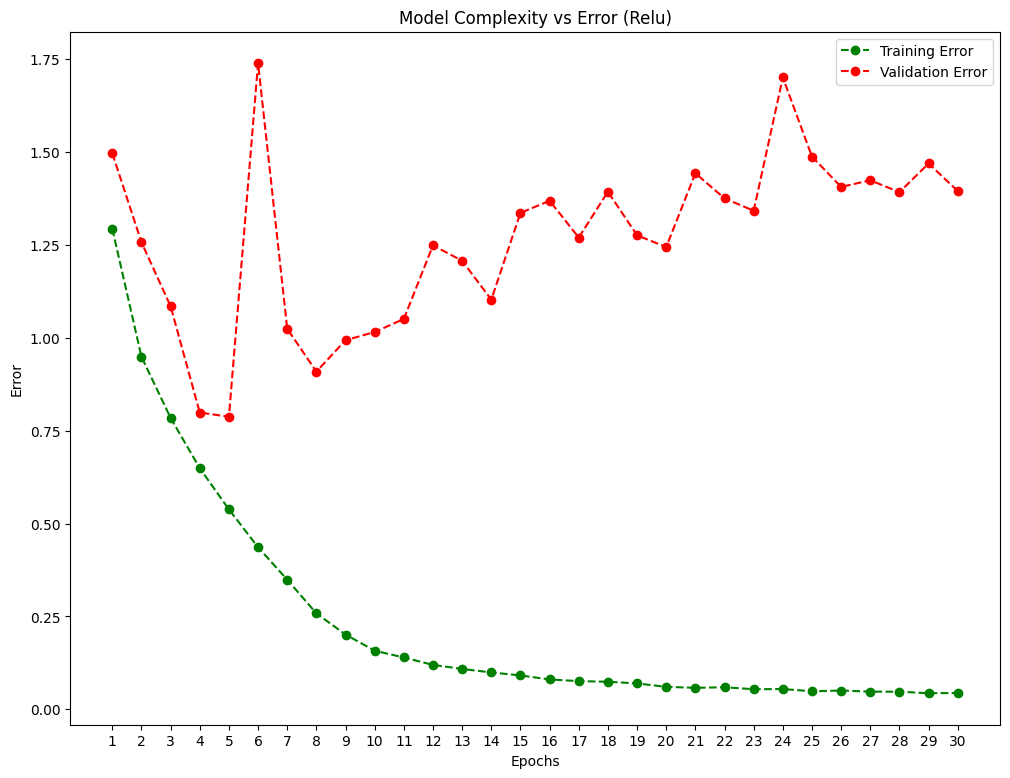

In [ ]:
plt.figure(figsize=(12, 9))
ax = plt.axes()
ax.plot(range(1, 31), relu['loss_train'], "go--", label="Training Error")
ax.plot(range(1, 31), relu['loss_val'], "ro--", label="Validation Error")
ax.legend()
plt.xticks(np.arange(1, 31))
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Model Complexity vs Error (Relu)")
plt.show()

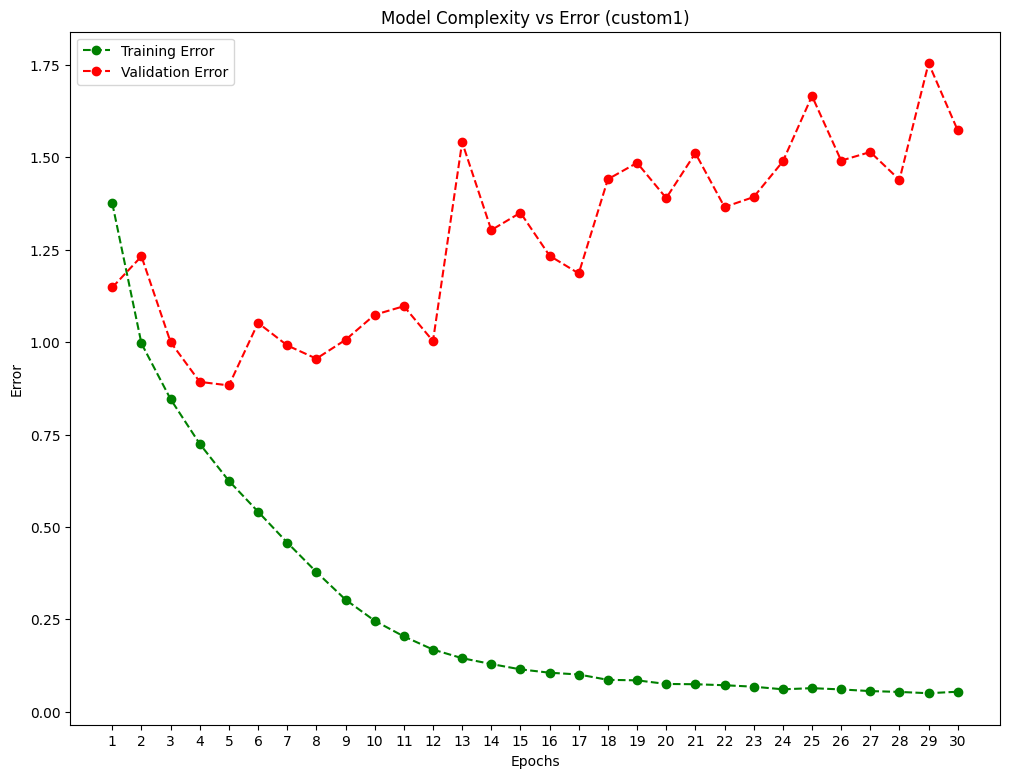

In [ ]:
plt.figure(figsize=(12, 9))
ax = plt.axes()
ax.plot(range(1, 31), custom1['loss_train'], "go--", label="Training Error")
ax.plot(range(1, 31), custom1['loss_val'], "ro--", label="Validation Error")
ax.legend()
plt.xticks(np.arange(1, 31))
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Model Complexity vs Error (custom1)")
plt.show()

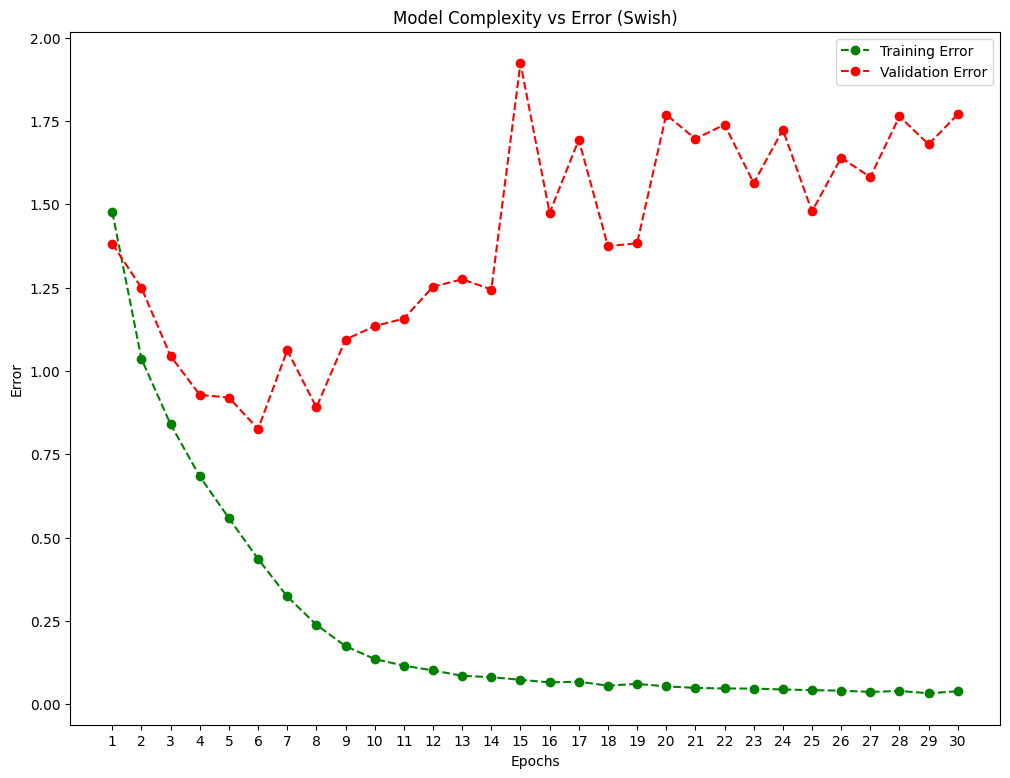

In [ ]:
plt.figure(figsize=(12, 9))
ax = plt.axes()
ax.plot(range(1, 31), swish['loss_train'], "go--", label="Training Error")
ax.plot(range(1, 31), swish['loss_val'], "ro--", label="Validation Error")
ax.legend()
plt.xticks(np.arange(1, 31))
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Model Complexity vs Error (Swish)")
plt.show()

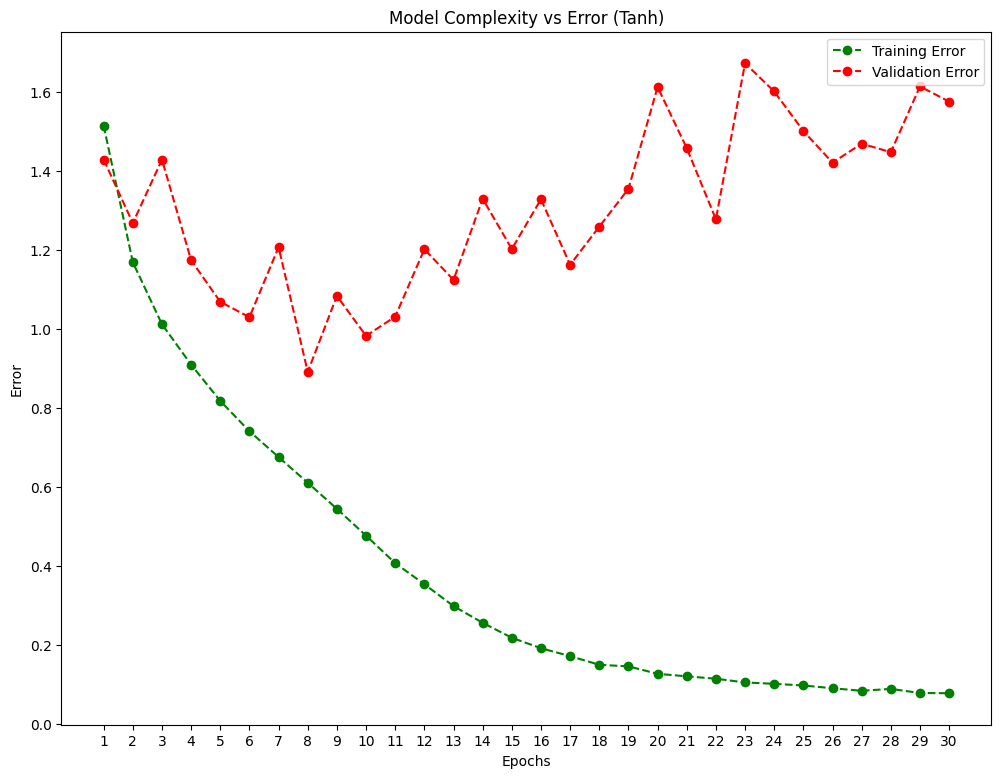

In [ ]:
plt.figure(figsize=(12, 9))
ax = plt.axes()
ax.plot(range(1, 31), tanh['loss_train'], "go--", label="Training Error")
ax.plot(range(1, 31), tanh['loss_val'], "ro--", label="Validation Error")
ax.legend()
plt.xticks(np.arange(1, 31))
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Model Complexity vs Error (Tanh)")
plt.show()

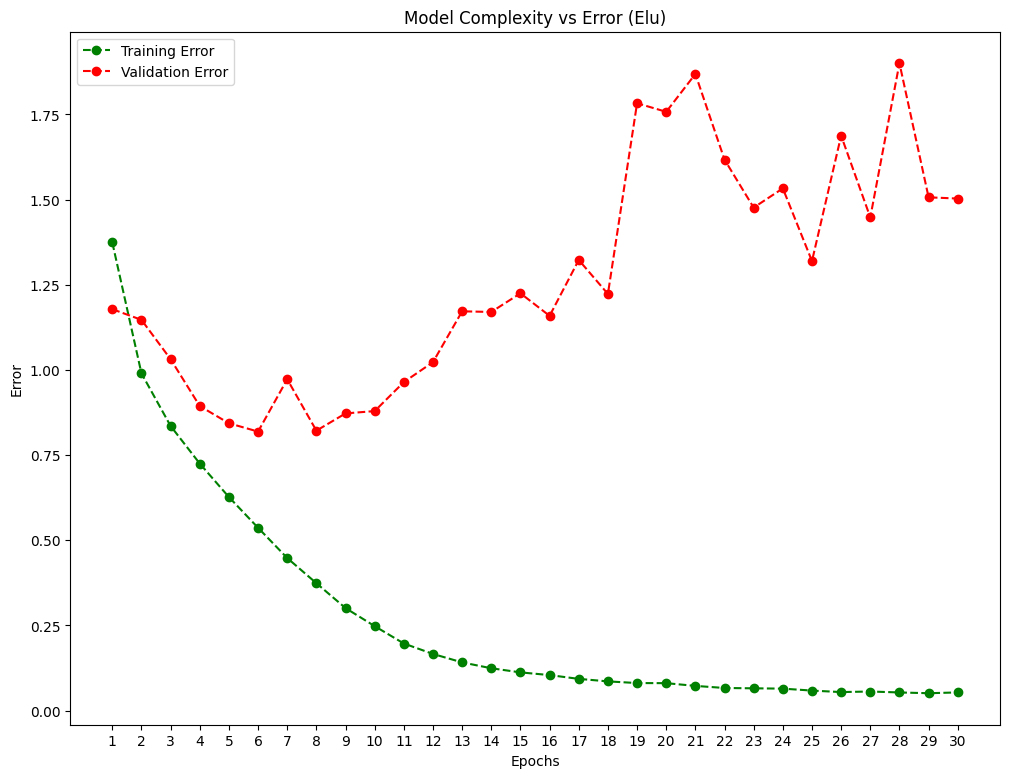

In [ ]:
plt.figure(figsize=(12, 9))
ax = plt.axes()
ax.plot(range(1, 31), elu['loss_train'], "go--", label="Training Error")
ax.plot(range(1, 31), elu['loss_val'], "ro--", label="Validation Error")
ax.legend()
plt.xticks(np.arange(1, 31))
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Model Complexity vs Error (Elu)")
plt.show()

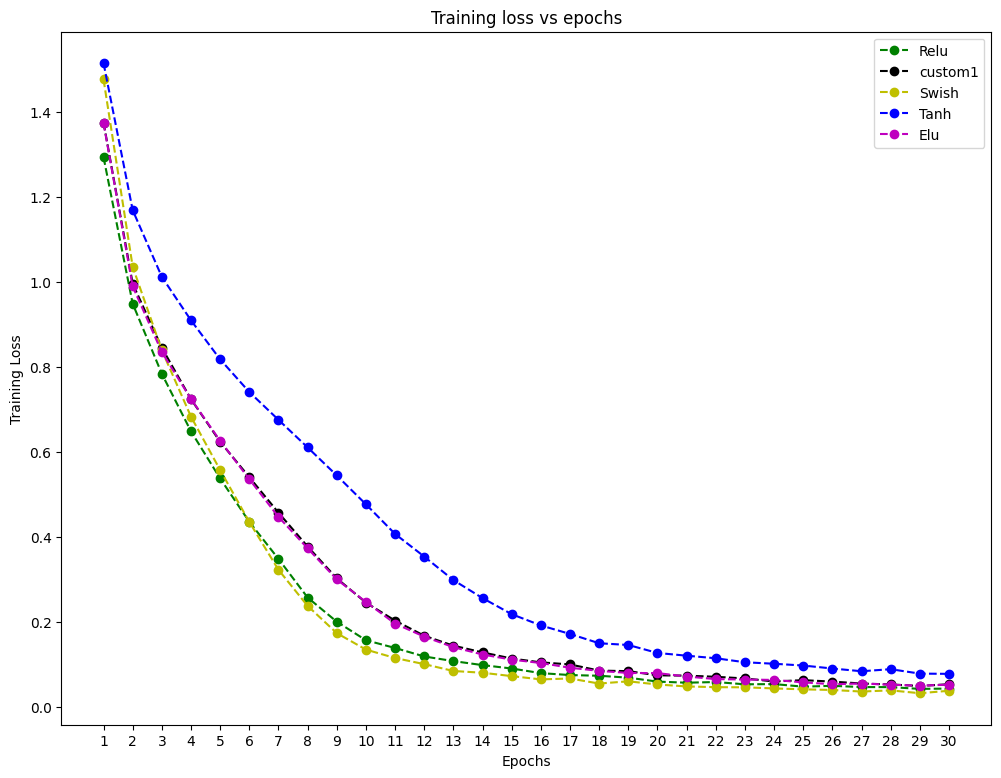

In [ ]:
plt.figure(figsize=(12, 9))

plt.plot(range(1, 31), relu['loss_train'], "go--", label="Relu")
plt.plot(range(1, 31), custom1['loss_train'], "ko--", label="custom1")
plt.plot(range(1, 31), swish['loss_train'], "yo--", label="Swish")
plt.plot(range(1, 31), tanh['loss_train'], "bo--", label="Tanh")
plt.plot(range(1, 31), elu['loss_train'], "mo--", label="Elu")

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.xticks(range(1, 31))
plt.title("Training loss vs epochs")
plt.legend()
plt.show()

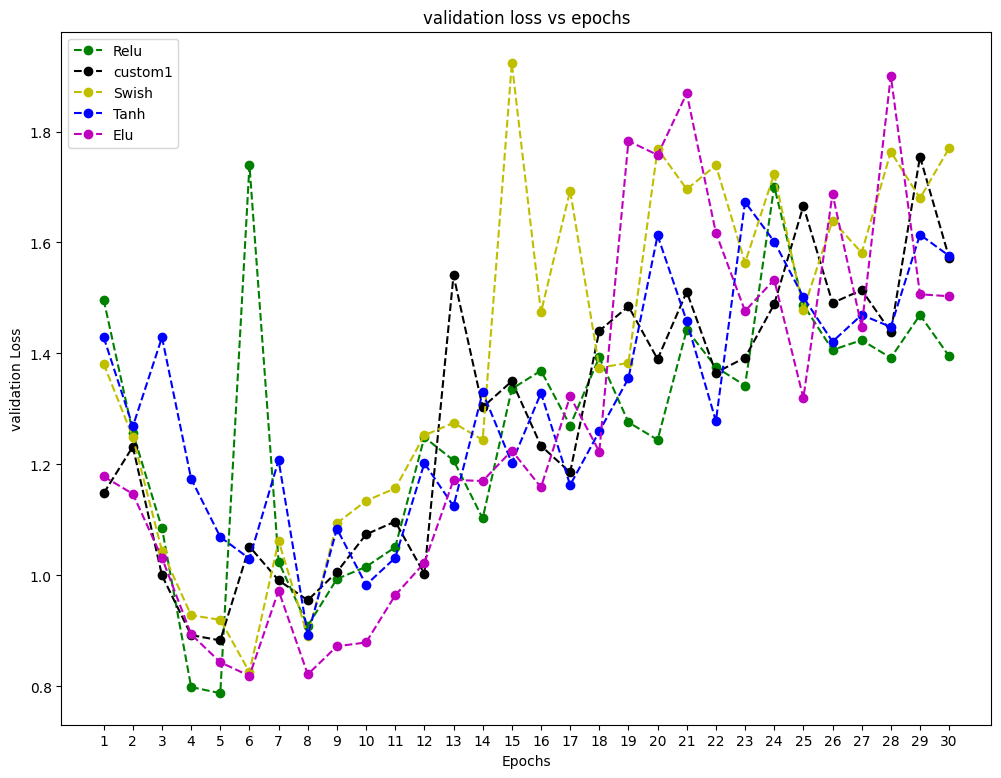

In [ ]:
plt.figure(figsize=(12, 9))

plt.plot(range(1, 31), relu['loss_val'], "go--", label="Relu")
plt.plot(range(1, 31), custom1['loss_val'], "ko--", label="custom1")
plt.plot(range(1, 31), swish['loss_val'], "yo--", label="Swish")
plt.plot(range(1, 31), tanh['loss_val'], "bo--", label="Tanh")
plt.plot(range(1, 31), elu['loss_val'], "mo--", label="Elu")

plt.xlabel("Epochs")
plt.ylabel("validation Loss")
plt.xticks(range(1, 31))
plt.title("validation loss vs epochs")
plt.legend()
plt.show()

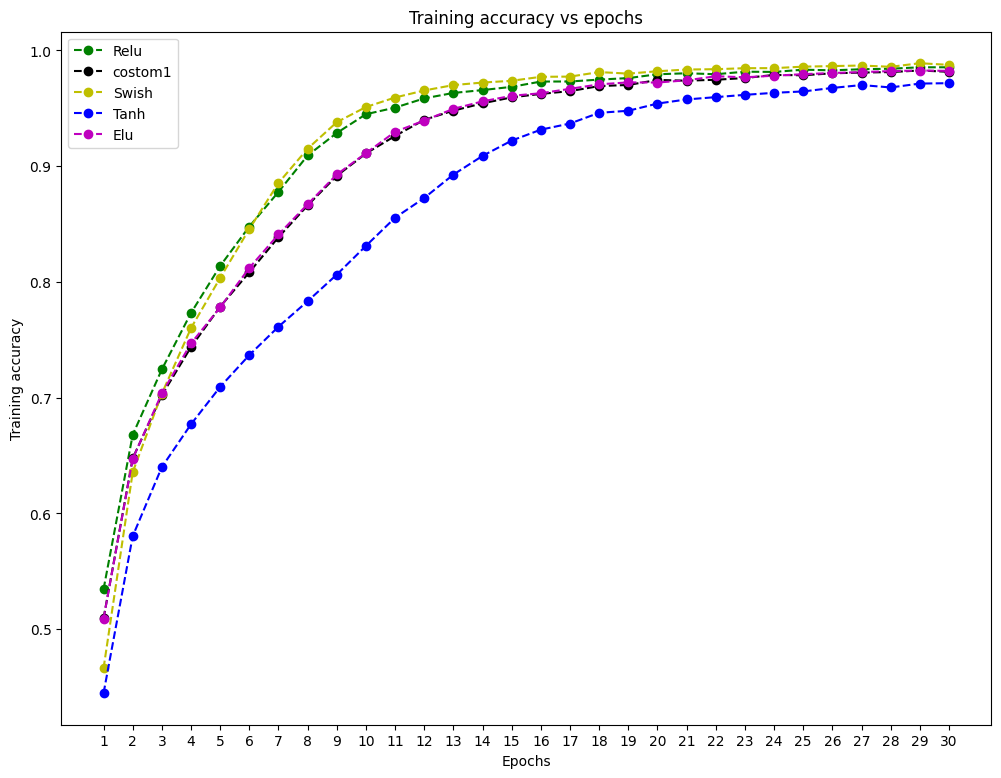

In [ ]:
plt.figure(figsize=(12, 9))

plt.plot(range(1, 31), relu['acc_train'], "go--", label="Relu")
plt.plot(range(1, 31), custom1['acc_train'], "ko--", label="costom1")
plt.plot(range(1, 31), swish['acc_train'], "yo--", label="Swish")
plt.plot(range(1, 31), tanh['acc_train'], "bo--", label="Tanh")
plt.plot(range(1, 31), elu['acc_train'], "mo--", label="Elu")

plt.xlabel("Epochs")
plt.ylabel("Training accuracy")
plt.xticks(range(1, 31))
plt.title("Training accuracy vs epochs")
plt.legend()
plt.show()

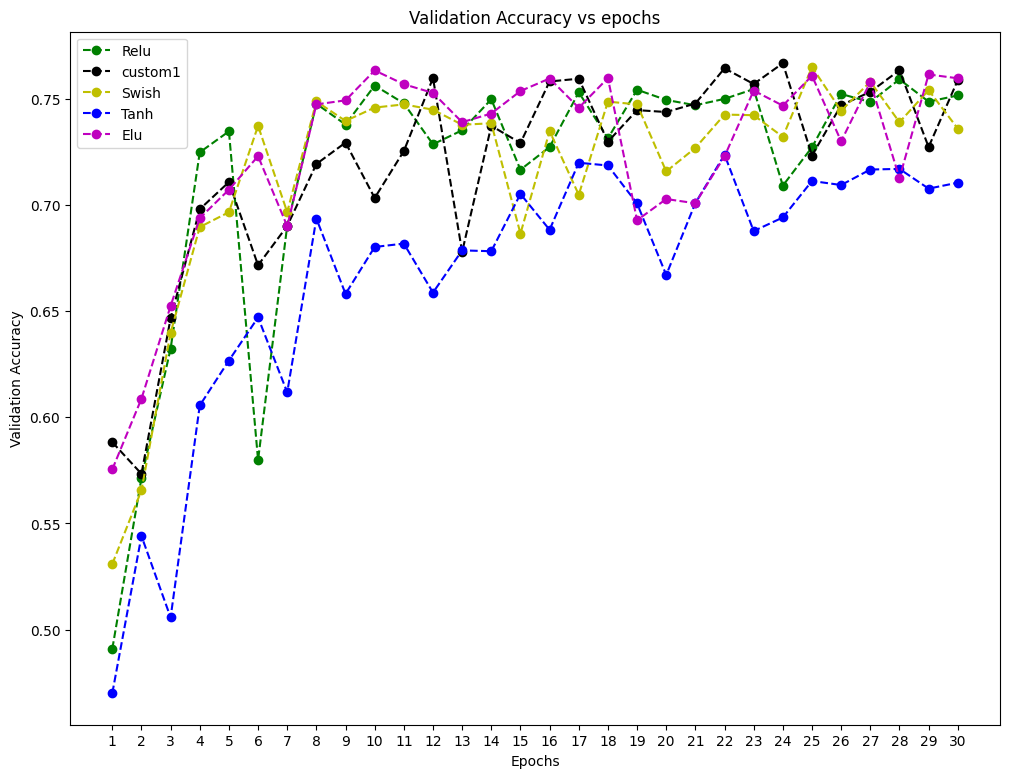

In [ ]:
plt.figure(figsize=(12, 9))

plt.plot(range(1, 31), relu['acc_val'], "go--", label="Relu")
plt.plot(range(1, 31), custom1['acc_val'], "ko--", label="custom1")
plt.plot(range(1, 31), swish['acc_val'], "yo--", label="Swish")
plt.plot(range(1, 31), tanh['acc_val'], "bo--", label="Tanh")
plt.plot(range(1, 31), elu['acc_val'], "mo--", label="Elu")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.xticks(range(1, 31))
plt.title("Validation Accuracy vs epochs")
plt.legend()
plt.show()

In [ ]:
import pandas as pd

columns = {0: "Precision", 1: "Recall", 2: "F1 Score"}
index = {
    0: "Relu",
    1: "Custom1",
    2: "Swish",
    3: "Tanh",
    4: "Elu",
}
list_of_scores = [
    relu['prf_score'],
    custom1['prf_score'],
    swish['prf_score'],
    tanh['prf_score'],
    elu['prf_score']
]
test_accuracy = pd.Series(
    [relu['score'][1], custom1['score'][1], swish['score'][1], tanh['score'][1], elu['score'][1]],
    name="Test Acc.",
)

df1 = pd.concat(
    [pd.DataFrame(list_of_scores).drop(columns=[3]), test_accuracy], axis=1
).rename(columns=columns, index=index)

df1_sorted = df1.sort_values(by='Test Acc.', ascending=False)

print(round(df1_sorted, 3))


         Precision  Recall  F1 Score  Test Acc.
Elu          0.769   0.760     0.762      0.760
Custom1      0.764   0.759     0.759      0.759
Relu         0.761   0.752     0.755      0.752
Swish        0.759   0.736     0.740      0.736
Tanh         0.717   0.711     0.709      0.711


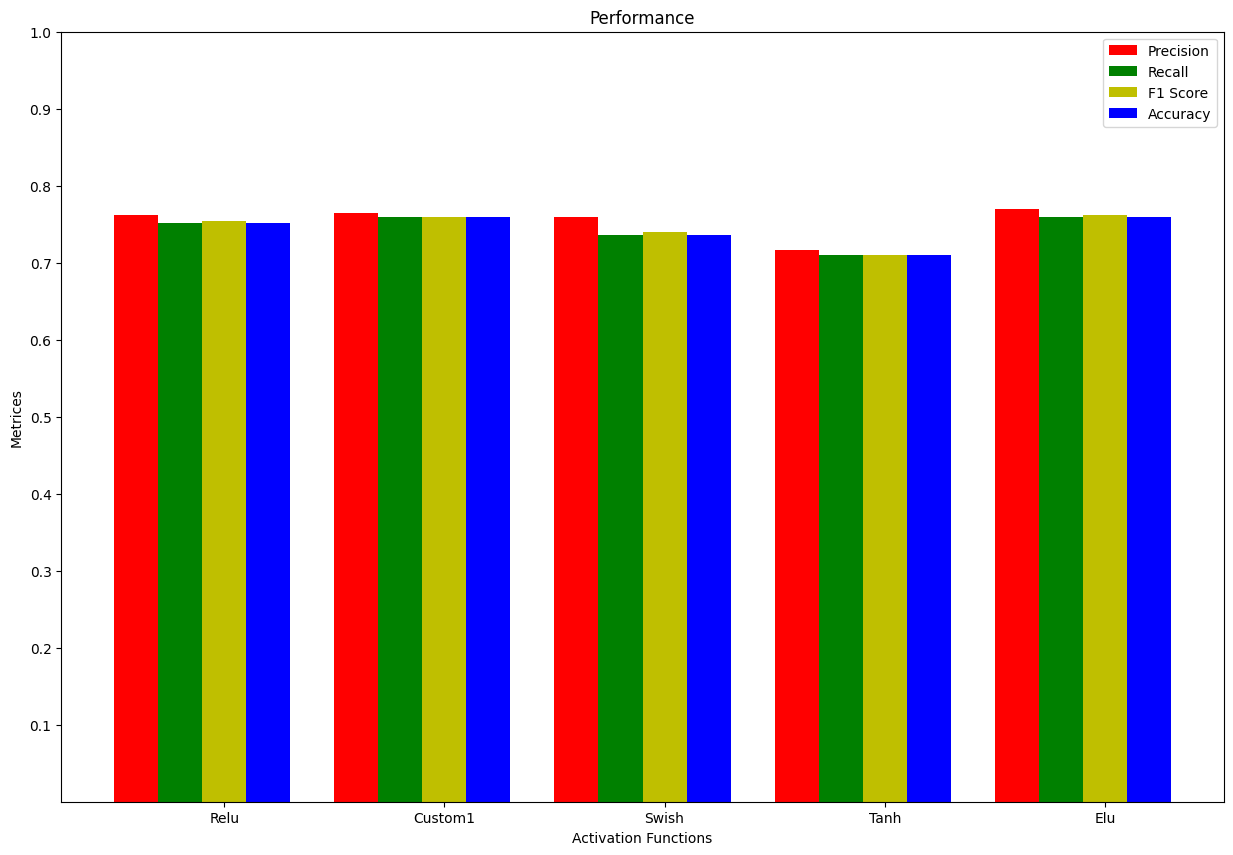

In [ ]:
precisions = [score[0] for score in list_of_scores]
recalls = [score[1] for score in list_of_scores]
f1_scores = [score[2] for score in list_of_scores]

width = 0.2
classes_idx = np.array(list(index.keys()))
plt.figure(figsize=(15, 10))
plt.bar(classes_idx - 2 * width, precisions, width=width, color="r", label="Precision")
plt.bar(classes_idx - width, recalls, width=width, color="g", label="Recall")
plt.bar(list(index.values()), f1_scores, width=width, color="y", label="F1 Score")
plt.bar(classes_idx + width, test_accuracy, width=width, color="b", label="Accuracy")

plt.xlabel("Activation Functions")
plt.ylabel("Metrices")
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.title("Performance")
plt.legend()
plt.show()

<BarContainer object of 5 artists>

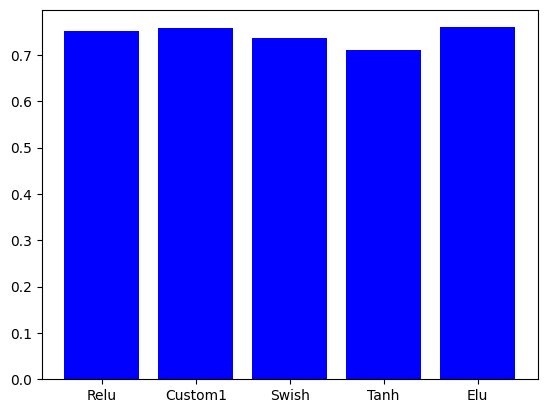

In [ ]:
plt.bar(list(index.values()), test_accuracy, width=0.8, color="b", label="Accuracy")